In [9]:
import numpy as np
import matplotlib.pyplot as plt
import damask


### 1. Read the simulation results

In [10]:
from pathlib import Path
path = Path()
file = path.joinpath('newAL_linear_UAT_RD_tensionX.hdf5')
result = damask.Result(file)
result 

Created by /usr/bin/DAMASK_grid v3.0.0-alpha7
        on 2023-12-07 09:52:40+0200
 executing "/usr/bin/DAMASK_grid --load /scratch/project_2008630/test/AA5754_DB/loads/linear_UAT_RD_tensionX.yaml --geom newAL.vti"

increment_0 (0.0 s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        F_vM / 1: Mises equivalent strain of F (deformation gradient)
        IPFcolor_(1 0 0) / 8-bit RGB: Inverse Pole Figure (IPF) colors along sample direction (1 0 0)
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_U^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_U^0.0(F_p) / 1: strain tensor of F_p (plastic deformation gradient)
        epsilon_U^0.0(F_p)_vM / 1: Mises equivalent strain of epsilon_U^0.0(F_p) (strain tensor of F_p (plastic defo

### 2. Adding a bunch of calculation to the result

In [11]:
try:
    # Try to add the stress Cauchy if it's not in the result
    if 'sigma' not in result.get():
        result.add_stress_Cauchy()

    # Try to add the strain 'F' and 'F_p' if they're not in the result
    if 'F' not in result.get():
        result.add_strain('F', 'U')
    if 'F_p' not in result.get():
        result.add_strain('F_p', 'U')

    # Try to add the equivalent Mises 'sigma' and 'F' if they're not in the result
    if 'sigma_vM' not in result.get():
        result.add_equivalent_Mises('sigma')
    if 'F_vM' not in result.get():
        result.add_equivalent_Mises('F')

    # Try to add the strain and strain 'F_p' if they're not in the result
    if 'epsilon_V^0.0(F)' not in result.get():
        result.add_strain()
        result.add_strain('F_p')

    # Try to add the equivalent Mises 'epsilon_V^0.0(F)' and 'epsilon_U^0.0(F_p)' if they're not in the result
    if 'epsilon_V^0.0(F)_vM' not in result.get():
        result.add_equivalent_Mises('epsilon_V^0.0(F)')
    if 'epsilon_U^0.0(F_p)_vM' not in result.get():
        result.add_equivalent_Mises('epsilon_U^0.0(F_p)')

    # Try to add the IPF color if it's not in the result
    if 'IPFcolor_(1 0 0)' not in result.get():
        result.add_IPF_color(np.array([1,0,0]))
except:
    pass

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   0% ETA n/a

### 3. Extracting the experimental data and ploting the results

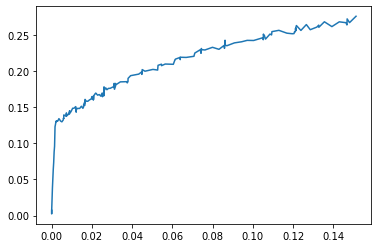

In [12]:
from pathlib import Path
from matplotlib import pyplot as plt
path = Path()
file = path.joinpath('Book1.csv')
import csv
ex_epsilon = []
ex_sigma = []

with open(file) as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        epsilon_str = row[0]
        sigma_str = row[1]

        if epsilon_str and sigma_str:
            try:
                ex_epsilon.append(float(epsilon_str))
                ex_sigma.append(float(sigma_str))
            except ValueError:
                pass
plt.plot(ex_epsilon, [s*1e-3 for s in ex_sigma])

In [13]:
#### 4. Plotting the stress-strain curve of the simulation and the experiment

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


Text(0.5, 1.0, 'True stress-strain Curve')

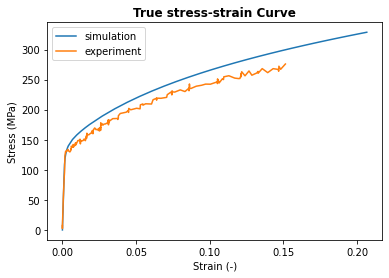

In [14]:
epsilon = [np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()]
sigma = [np.average(s) for s in result.get('sigma_vM').values()]
plt.plot(epsilon, [s/1000000 for s in sigma], label='simulation')
plt.plot(ex_epsilon, ex_sigma, label='experiment')
plt.xlabel('Strain (-)')
plt.ylabel('Stress (MPa)')
plt.legend()
plt.title('True stress-strain Curve', weight='bold')


#### 5. Plotting the engineering stress-strain curve of the simulation data

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


Text(0.5, 1.0, 'Engineering stress-strain Curve')

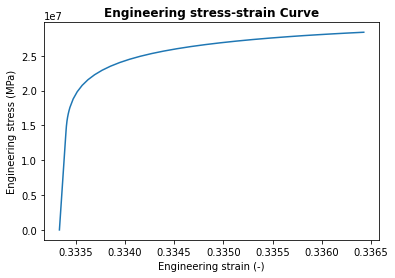

In [17]:
engineering_strain = [np.average(e) for e in result.get('F').values()]
engineering_stress = [np.average(s) for s in result.get('P').values()]
plt.plot(engineering_strain, engineering_stress)

plt.xlabel('Engineering strain (-)')
plt.ylabel('Engineering stress (MPa)')
plt.title('Engineering stress-strain Curve', weight='bold')

#### 6. Exporting the simulation data into VTK format for further visualization using paraview software

In [15]:
result.export_VTK(parallel=False)